In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('TRAIN.csv')
train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [3]:
train.shape

(100000, 9)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
index               100000 non-null int64
time_stamp          100000 non-null int64
cab_provider        100000 non-null object
source              100000 non-null object
destination         100000 non-null object
distance            100000 non-null float64
surge_multiplier    100000 non-null float64
cab_type            100000 non-null object
fare                100000 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.9+ MB


In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('TEST.csv')
test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [7]:
test.shape

(25000, 8)

In [38]:
test['index'] = test['index'].astype(str)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
index               25000 non-null object
time_stamp          25000 non-null int64
cab_provider        25000 non-null int32
source              25000 non-null int32
destination         25000 non-null int32
distance            25000 non-null float64
surge_multiplier    25000 non-null float64
cab_type            25000 non-null int32
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
train['source'].value_counts()

North End                  8637
Financial District         8540
Theatre District           8445
South Station              8423
Back Bay                   8375
Haymarket Square           8337
Northeastern University    8333
Fenway                     8277
Beacon Hill                8277
Boston University          8231
West End                   8192
North Station              7933
Name: source, dtype: int64

In [10]:
train['destination'].value_counts()

Back Bay                   8547
North End                  8543
Financial District         8497
Theatre District           8469
North Station              8419
Fenway                     8352
West End                   8298
Northeastern University    8259
South Station              8222
Boston University          8206
Haymarket Square           8180
Beacon Hill                8008
Name: destination, dtype: int64

In [11]:
train['cab_provider'].value_counts()

Uber    51863
Lyft    48137
Name: cab_provider, dtype: int64

In [12]:
train['cab_type'].value_counts()

Black           8744
Black SUV       8712
UberXL          8676
UberX           8588
WAV             8585
UberPool        8558
Lyft XL         8115
Lux Black XL    8065
Lux             8060
Shared          7998
Lyft            7957
Lux Black       7942
Name: cab_type, dtype: int64

In [14]:
newtrain = train
newtest = test

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
x = ['cab_type', 'cab_provider', 'source', 'destination']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [16]:
newtrain = newtrain.drop('index', axis = 1)
newtest = newtest.drop('index', axis = 1)

In [17]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
time_stamp          100000 non-null int64
cab_provider        100000 non-null int32
source              100000 non-null int32
destination         100000 non-null int32
distance            100000 non-null float64
surge_multiplier    100000 non-null float64
cab_type            100000 non-null int32
fare                100000 non-null float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 4.6 MB


In [18]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
time_stamp          25000 non-null int64
cab_provider        25000 non-null int32
source              25000 non-null int32
destination         25000 non-null int32
distance            25000 non-null float64
surge_multiplier    25000 non-null float64
cab_type            25000 non-null int32
dtypes: float64(2), int32(4), int64(1)
memory usage: 976.6 KB


In [19]:
x = newtrain.drop('fare', axis = 1)
y = newtrain['fare']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [21]:
from sklearn.metrics import mean_squared_error

In [30]:
from lightgbm import LGBMRegressor 
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.7342535313761818


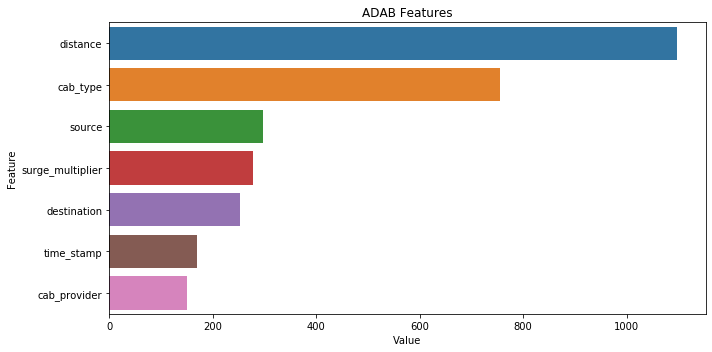

In [32]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('ADAB Features')
plt.tight_layout()
plt.show()

In [46]:
x_train = newtrain.drop(['fare', 'cab_provider', 'time_stamp'], axis = 1)
y_train = newtrain['fare']
x_test = newtest.drop(['cab_provider', 'time_stamp'], axis = 1)
from lightgbm import LGBMRegressor 
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'index' : test.index, 'fare' : y_pred})
solution.to_csv('Solution.csv', index = False)